In [291]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

X = mtcars.drop("am",axis=1)
y = mtcars.am

<Figure size 576x576 with 0 Axes>

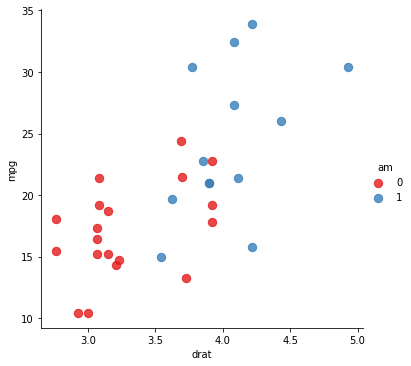

In [362]:
# Let's get two predictors from mtcars to predict the transmission type
predictors = mtcars[['drat','mpg']]
label_to_predict = mtcars.am

plt.figure(figsize=(8,8))
# Plot mpg vs drat as conditioned by am (tranmission type)
sns.lmplot(x='drat', y='mpg', 
           data=mtcars, 
           hue='am', 
           palette='Set1', 
           fit_reg=False,
           scatter_kws={"s": 70})


In [367]:
# Fit the SVM model
model = SVC(kernel='linear',C=1)
model.fit(predictors, label_to_predict)
model.score(predictors,label_to_predict)

0.8125

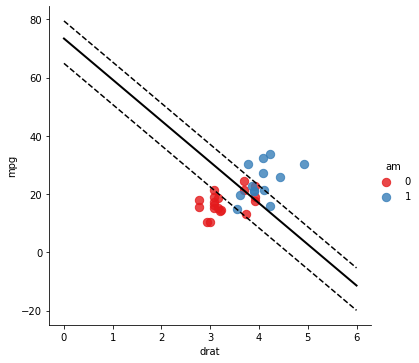

In [374]:

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 6)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot(x='drat', y='mpg', data=mtcars, hue='am', palette='Set1', fit_reg=False,scatter_kws={"s": 70})
#sns.scatterplot(data=mtcars,x='drat',y='mpg',hue='am')
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [327]:
def plotter():
    # Fit the SVM model
    
    j = 1
    for i in [.01,.05,1]:
        model = SVC(kernel='linear',C=i)
        model.fit(predictors, label_to_predict)
        model.score(predictors,label_to_predict)
        # Get the separating hyperplane
        w = model.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(0, 6)
        yy = a * xx - (model.intercept_[0]) / w[1]

        # Plot the parallels to the separating hyperplane that pass through the support vectors
        b = model.support_vectors_[0]
        yy_down = a * xx + (b[1] - a * b[0])
        b = model.support_vectors_[-1]
        yy_up = a * xx + (b[1] - a * b[0])
#
#        plt.figure()
        plt.subplot(3,1,j)
        # Look at the margins and support vectors
        sns.lmplot(x='drat', y='mpg', data=mtcars, hue='am', palette='Set1', fit_reg=False,scatter_kws={"s": 70})
        plt.plot(xx, yy, linewidth=2, color='black')
        plt.plot(xx, yy_down, 'k--')
        plt.plot(xx, yy_up, 'k--')
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                    s=80, facecolors='none');
        plt.show()
        j = j + 1
        

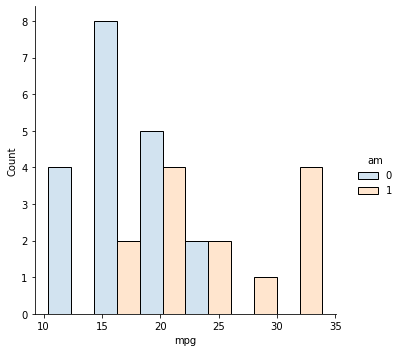

In [376]:
sns.displot(data=mtcars,x='mpg',hue='am',alpha=0.2,multiple="dodge")

<AxesSubplot:xlabel='wt', ylabel='mpg'>

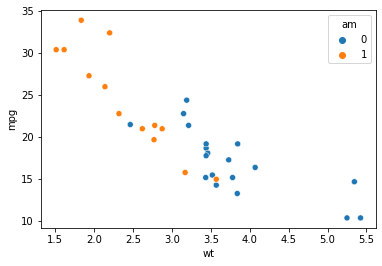

In [355]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=mtcars,x='wt',y='mpg',hue='am')

In [344]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can